1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.<br>
<strong><font color='royalblue'>So that's the right part of the Gaussian that covers 2% of the total distribution</font></strong>

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



<strong><font color='royalblue'>Col nostro modello possiamo considerare la distribuzione delle velocità massime dei venti come una gaussiana:</font></strong>

$$\color{blue}{f(x)=G_{maxwind}(x)}$$

<strong><font color='royalblue'>Che rappresenta una densità di probabilità, che integrata tra due estremi indica la probabilità di ottenere (in un anno generico) un vento massimo compreso tra quei valori</font></strong>

<strong><font color='royalblue'>La probabilità cumulativa è una funzione integranda di tale densità di probabilità:</font></strong>

$$\color{blue}{F[x]=\int_{-\infty}^{x} f(t)\,dt=\int_{-\infty}^{x} G_{maxwind}(t)\,dt}$$

<strong><font color='royalblue'>Che essendo una funzione crescente, è pure invertibile<br> Infatti noi siamo interessati alla sua inversa:<br> F[x] ci trova la p data una certa x (a noi interessa p=98%)<br> F^-1[p] trova quale x corrisponde ad una determinata p (=98%)</font></strong>

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76] 21


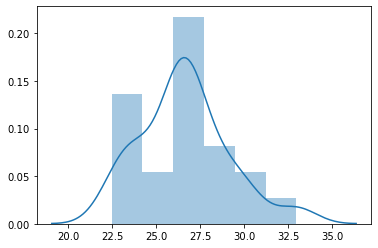

In [6]:
import numpy as np
import seaborn as sns
from scipy.interpolate import UnivariateSpline

max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

print(max_speeds,years_nb)
sns.distplot(max_speeds);

In [10]:
cprob = np.arange(years_nb)/(years_nb + 1) #probabilità cumulativa, con l'ipotesi che tutti i dati siano differenti

max_speeds_sorted = np.sort(max_speeds)

print(np.arange(years_nb),cprob)
print(max_speeds_sorted)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] [0.         0.04545455 0.09090909 0.13636364 0.18181818 0.22727273
 0.27272727 0.31818182 0.36363636 0.40909091 0.45454545 0.5
 0.54545455 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727
 0.81818182 0.86363636 0.90909091]
[22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


In [24]:
quantilefunction = UnivariateSpline(cprob, max_speeds_sorted)
#print(quantilefunction) #quantilefunction is a function duh
nprob = np.arange(0, 100)/100
#print(nprob)
fitted_max_speeds = quantilefunction(nprob)

In [25]:
fifty_prob = 1. - 0.02
fifty_wind = quantilefunction(fifty_prob)
fifty_wind     

array(34.6334558)

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

In [26]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize


%matplotlib inline
#plt.style.use('ggplot')
%precision 4
#np.set_printoptions(suppress=True)

'%.4f'

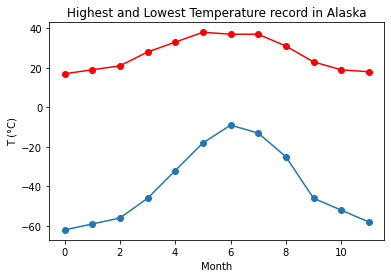

In [27]:
# let's make an array of months:
months = np.arange(12)
#print(months)
tmax =[17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
tmin =[-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]

tmax = np.array(tmax)
tmin = np.array(tmin)
#print(tmax,tmin)

tdatas = np.append(tmax,tmin)
    
plt.scatter(months,tdatas[:12],color='red')
plt.plot(months, tdatas[:12],color='red')
plt.scatter(months, tdatas[12:])
plt.plot(months, tdatas[12:])
plt.title("Highest and Lowest Temperature record in Alaska")
plt.xlabel("Month")
plt.ylabel("T (°C)")
plt.show()

In [28]:
# I didn't manage to find a function, this one is from internet
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

In [29]:
res_max, cov_max = optimize.curve_fit(yearly_temps, months, tmax, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months, tmin, [-40, 20, 0])

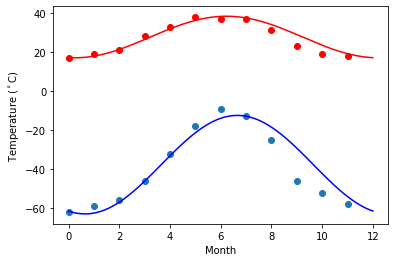

In [30]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, tmax, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, tmin, 'o')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


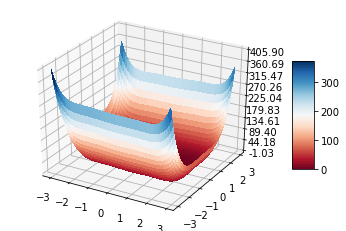

In [31]:
# let's plot this function, just to get an idea of what we are dealing with
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def z_func(x,y):
    return ((4 - 2.1*(x**2) + ((x**4)/3))*x**2)+ x*y +(4 *(y**2) - 4)* y**2


x = np.arange(-3.0,3.0,0.1)
y = np.arange(-3.0,3.0,0.1)
X,Y = np.meshgrid(x, y)
Z = z_func(X,Y)

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                      cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [54]:
def z_func(params):
    x, y = params
    return ((4 - 2.1*(x**2) + ((x**4)/3))*x**2)+ x*y +(4 *(y**2) - 4)* y**2


for i in range(1000):
    guess = np.random.rand(2,1)*100
    #print(guess)
    result = scipy.optimize.minimize(z_func, guess)

result

      fun: 2.104250310311259
 hess_inv: array([[ 0.1052, -0.0141],
       [-0.0141,  0.1348]])
      jac: array([-5.9605e-08,  5.9605e-08])
  message: 'Optimization terminated successfully.'
     nfev: 135
      nit: 38
     njev: 45
   status: 0
  success: True
        x: array([1.6071, 0.5687])

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

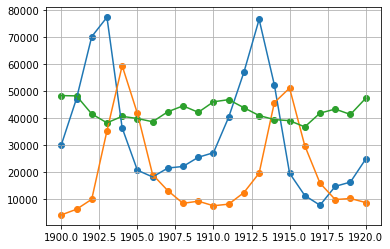

Means:
 Mean:  34080.95238095238 
 Lynx:  20166.666666666668 
 Carrot: 42400.0

St. Deviations:
 Mean:  20897.906458089667 
 Lynx:  16254.591536908763 
 Carrot: 3322.5062255844787

Correlation between hare and lynx:  [[1.     0.0719]
 [0.0719 1.    ]]

Correlation between hare and carrot:  [[ 1.     -0.0166]
 [-0.0166  1.    ]]

Correlation between lynx and carrot:  [[ 1.     -0.6806]
 [-0.6806  1.    ]]


In [32]:
# Let's copy some old code
file = open("populations.txt","r")
data = np.loadtxt(file,skiprows=1)

years = data[:,0] # array of years

hare = data[:,1] # array of hare
lynx = data[:,2] # array of lynx
carrot = data[:,3] # array of carrot

fig = plt.figure()
ax = fig.gca()
plt.scatter(years, hare)
plt.scatter(years, lynx)
plt.scatter(years, carrot)
plt.plot(years, hare)
plt.plot(years, lynx)
plt.plot(years, carrot)
plt.grid()
plt.show()

meanhare = np.mean(hare)
meanlynx = np.mean(lynx)
meancarrot = np.mean(carrot)

print('Means:\n Mean: ',meanhare,'\n Lynx: ',meanlynx,'\n Carrot:',meancarrot)

stdevhare = np.std(hare)
stdevlynx = np.std(lynx)
stdevcarrot = np.std(carrot)

print('\nSt. Deviations:\n Mean: ',stdevhare,'\n Lynx: ',stdevlynx,'\n Carrot:',stdevcarrot)
print('\nCorrelation between hare and lynx: ',np.corrcoef(hare,lynx))
print('\nCorrelation between hare and carrot: ',np.corrcoef(hare,carrot))
print('\nCorrelation between lynx and carrot: ',np.corrcoef(carrot,lynx))
#print(data,x)

In [232]:
from scipy import fftpack

Text(0, 0.5, 'power')

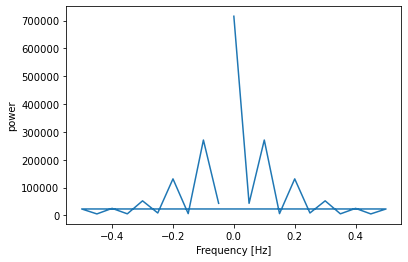

In [233]:
time_step = (years[years.size-1] - years[0])/years.size
period = 10

# The FFT of the signal
hare_fft = fftpack.fft(hare)

# And the power (sig_fft is of complex dtype)
hare_power = np.abs(hare_fft)

# The corresponding frequencies
hare_sample_freq = fftpack.fftfreq(hare.size, d=time_step)

# Plot the FFT power
plt.plot(hare_sample_freq, hare_power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('power')

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

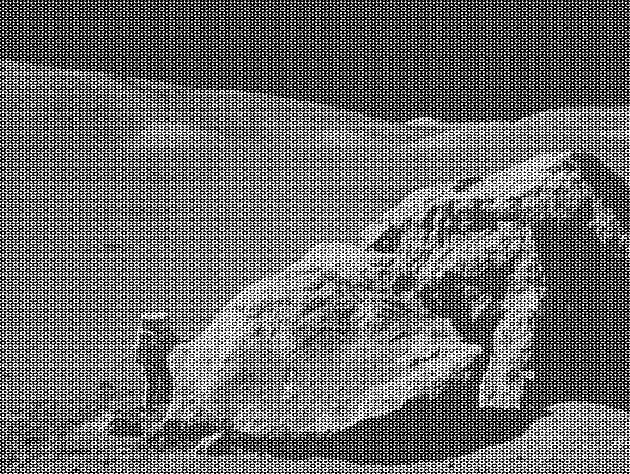

In [357]:
fft_filter = 2000

# Let's see how the image looks like

from IPython.display import Image
Image("moonlanding.png")

In [358]:
import pylab

moonimg = pylab.imread("moonlanding.png")

In [359]:
import scipy.fft
fftimg = scipy.fft.fft2(moonimg)

In [360]:
# The output is a 2D array of complex numbers, for this reason we can't plot it
print(fftimg)

[[126598.46     -0.j      -4608.579 -1892.4691j   -322.0927  -20.2777j
  ...   -906.1584+1539.3083j   -322.0927  +20.2777j
   -4608.579 +1892.4691j]
 [ -9421.1   +5242.114j    5224.017 -3171.743j    1607.9927+1269.4243j
  ...   -677.345  -936.1617j    354.6246-1003.8347j
    1965.366 -2188.0593j]
 [ -2928.3508+7280.916j   -1116.4069+1338.3181j   -474.2006 +385.4021j
  ...    239.7722 -977.2128j   1582.9283 -261.9535j
    2641.927  -292.0936j]
 ...
 [  1850.5717-2451.1785j   -781.0807  +13.7445j    377.907   +12.6698j
  ...  -1526.7867+1271.2621j  -2705.5718-3488.5286j
    1897.4039-2281.9092j]
 [ -2928.3508-7280.916j    2641.927  +292.0936j   1582.9283 +261.9535j
  ...  -2208.43    +81.8074j   -474.2006 -385.4021j
   -1116.4069-1338.3181j]
 [ -9421.1   -5242.114j    1965.366 +2188.0593j    354.6246+1003.8347j
  ...   1190.5853-1431.9934j   1607.9927-1269.4243j
    5224.017 +3171.743j ]]


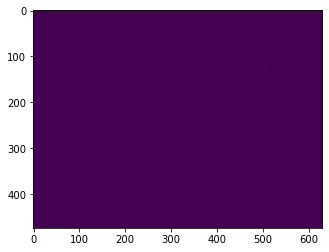

In [361]:
plt.imshow(abs(fftimg))
# It doesn't seem right

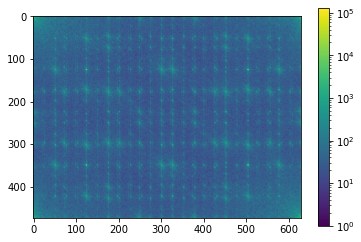

In [362]:
from matplotlib.colors import LogNorm


plt.figure()

plt.imshow(np.abs(fftimg), norm=LogNorm(vmin=1))
plt.colorbar()

In [366]:
print(fftimg)
fftimg[abs(fftimg.real) > fft_filter] = 0
print(fftimg)

[[    0.       +0.j     -4608.579 -1892.4691j  -322.0927  -20.2777j ...
   -906.1584+1539.3083j  -322.0927  +20.2777j -4608.579 +1892.4691j]
 [-9421.1   +5242.114j      0.       +0.j      1607.9927+1269.4243j ...
   -677.345  -936.1617j   354.6246-1003.8347j  1965.366 -2188.0593j]
 [-2928.3508+7280.916j  -1116.4069+1338.3181j  -474.2006 +385.4021j ...
    239.7722 -977.2128j  1582.9283 -261.9535j     0.       +0.j    ]
 ...
 [ 1850.5717-2451.1785j  -781.0807  +13.7445j   377.907   +12.6698j ...
  -1526.7867+1271.2621j -2705.5718-3488.5286j  1897.4039-2281.9092j]
 [-2928.3508-7280.916j      0.       +0.j      1582.9283 +261.9535j ...
  -2208.43    +81.8074j  -474.2006 -385.4021j -1116.4069-1338.3181j]
 [-9421.1   -5242.114j   1965.366 +2188.0593j   354.6246+1003.8347j ...
   1190.5853-1431.9934j  1607.9927-1269.4243j     0.       +0.j    ]]
[[    0.       +0.j         0.       +0.j      -322.0927  -20.2777j ...
   -906.1584+1539.3083j  -322.0927  +20.2777j     0.       +0.j    ]
 [    0

Text(0.5, 1.0, 'Reconstructed Image')

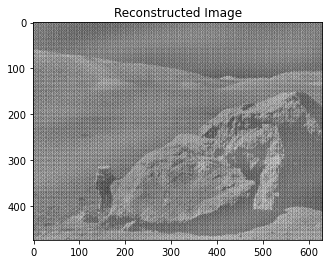

In [367]:
im_new = scipy.fftpack.ifft2(fftimg).real

from PIL import Image

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')